# Bias-Variance Tradeoff

A training dataset is represented as: $ \mathcal{D} \{(x_i, y_i)\}_{i=1}^N $

where the data points $(x_i, y_i)$ are drawn i.i.d. from a distribution $P$.

The __Expected target__ of y given x is

$$
\Large \text{$\hat{y}(x) = E[y|x] = \int_{y} p(y|x) dy $}
$$

---

### Estimated Prediction Model (Regression)

ML __enstimates a prediction model__ $\hat{f}(x, \theta)$ by minimizing:

$$
\Large \text{$E_{(x, y) P}[(\hat{f}(x, \theta) - y)^2] = \int_{x} \int_{y} (\hat{f}(x, \theta) - y)^2 p(y|x) dy dx$}
$$


As $p(𝑥, 𝑦)$ is typically unknown we __approximate the error__:

$$
\Large \text{$E_{(x, y) ~ P}[(\hat{f}(x, \theta) - y)^2] \approx \frac{1}{N} \sum_{i=1}^{N} (\hat{f}(x, \theta) - y)^2 $}
$$

The __estimated model__ $\hat{f}$ given a training set $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^N $ is 

$$
\Large \text{$\hat{f}(x; \mathcal{D}) = \hat{f}(x, \theta^{*} )$ s.t. $ \theta^{*} = argmin_{\theta} \frac{1}{N} \sum_{i=1}^{N} (\hat{f}(x, \theta) - y)^2 $}
$$



In [183]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [184]:
# Set random seed
np.random.seed(42)

In [ ]:
# Size of dataset
N = 20

# Normal distribution N ~ (mu, sigma)
noise_1 = np.random.normal(0, 0.5, N)
noise_2 = np.random.normal(0, 0.5, N)

# Create training data
X_train = np.linspace(0, 6, N)
X_continues = np.linspace(0, 6, 100)
y_train = np.sin(X_train) + noise_1

# Create testing data
X_test = np.linspace(0, 6, N)
y_test = np.sin(X_test) + noise_2

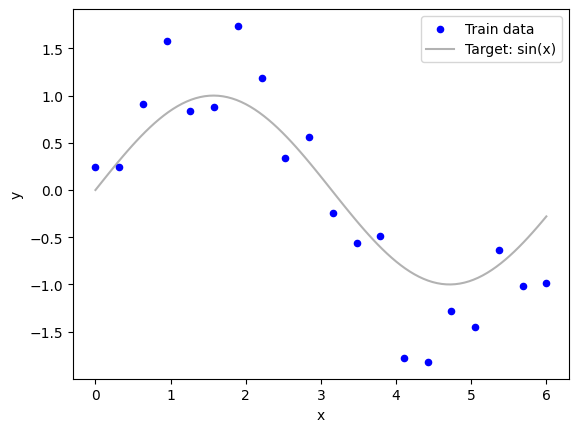

In [186]:
plt.scatter(X_train, y_train, color='blue', s=20, label='Train data')
plt.plot(X_continues, np.sin(X_continues), color='black', alpha=0.3, label='Target: sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [187]:
# Create 4 diffrent models
model1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model4 = make_pipeline(PolynomialFeatures(16), LinearRegression())

# Train the models
model1.fit(X_train.reshape(-1, 1), y_train)
model2.fit(X_train.reshape(-1, 1), y_train)
model3.fit(X_train.reshape(-1, 1), y_train)
model4.fit(X_train.reshape(-1, 1), y_train)

# Calculate Squared error

model1_mse = mean_squared_error(y_test, model1.predict(X_test.reshape(-1,1)))
model2_mse = mean_squared_error(y_test, model2.predict(X_test.reshape(-1,1)))
model3_mse = mean_squared_error(y_test, model3.predict(X_test.reshape(-1,1)))
model4_mse = mean_squared_error(y_test, model4.predict(X_test.reshape(-1,1)))

# Store MSE values
mse_values = [model1_mse, model2_mse, model3_mse, model4_mse]
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

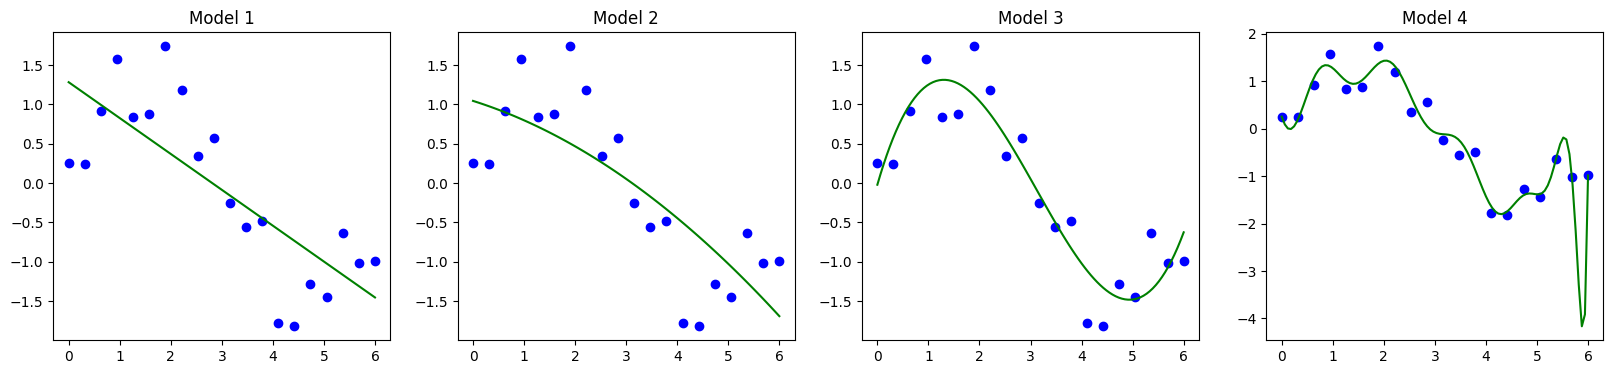

In [188]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot each subplot
axs[0].set_title("Model 1")
axs[0].plot(X_train, y_train, 'bo')
axs[0].plot(X_continues, model1.predict(X_continues.reshape(-1, 1)), color='green')

axs[1].set_title("Model 2")
axs[1].plot(X_train, y_train, 'bo')
axs[1].plot(X_continues, model2.predict(X_continues.reshape(-1, 1)), color='green')

axs[2].set_title("Model 3")
axs[2].plot(X_train, y_train, 'bo')
axs[2].plot(X_continues, model3.predict(X_continues.reshape(-1, 1)), color='green')

axs[3].set_title("Model 4")
axs[3].plot(X_train, y_train, 'bo')
axs[3].plot(X_continues, model4.predict(X_continues.reshape(-1, 1)), color='green')

plt.show()

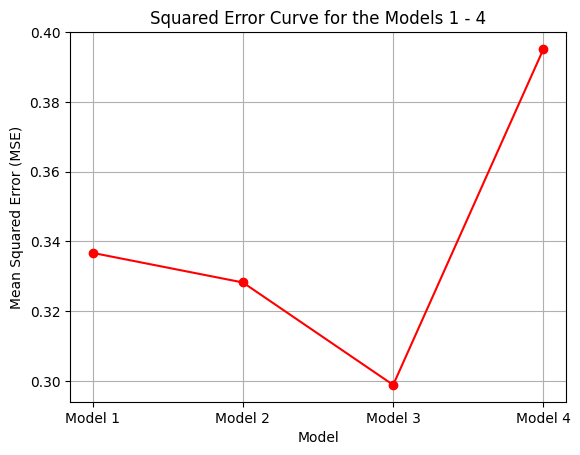

In [189]:
# Plotting the squared error curve
plt.plot(models, mse_values, marker='o', linestyle='-', color='red')
plt.title("Squared Error Curve for the Models 1 - 4")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()